In [29]:
import numpy as np
from numpy.fft import fft, fftfreq, ifft
from numpy import log as ln
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from astropy.io import fits
import itertools

In [30]:
file_name = "superburst_4U1636_800s_bary.lc"

In [31]:
fits.getdata(file_name, ext = 1).columns

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'
    name = 'RATE'; format = '1D'; unit = 'counts/s'
    name = 'ERROR'; format = '1D'; unit = 'counts/s'
    name = 'FRACEXP'; format = '1D'
    name = 'BARYTIME'; format = '1D'
)

In [32]:
hdulist[1].data

FITS_rec([(2.25478946e+08,     0.        ,    0.        , 0.16937256, 2.25478858e+08),
          (2.25478946e+08,  4096.        , 2896.30937574, 1.        , 2.25478858e+08),
          (2.25478946e+08, 12288.        , 5016.55499322, 1.        , 2.25478858e+08),
          ...,
          (2.25479746e+08,  2048.        , 2048.        , 1.        , 2.25479658e+08),
          (2.25479746e+08, 18432.        , 6144.        , 1.        , 2.25479658e+08),
          (2.25479746e+08,  9862.42398413, 4931.21199206, 0.83062744, 2.25479658e+08)],
         dtype=(numpy.record, [('TIME', '>f8'), ('RATE', '>f8'), ('ERROR', '>f8'), ('FRACEXP', '>f8'), ('BARYTIME', '>f8')]))

In [45]:
hdulist = fits.open(file_name)

time_list = hdulist[1].data["BARYTIME"]
rate_list = hdulist[1].data["RATE"]

In [46]:
print(time_list[1] - time_list[0])

0.0004883408546447754


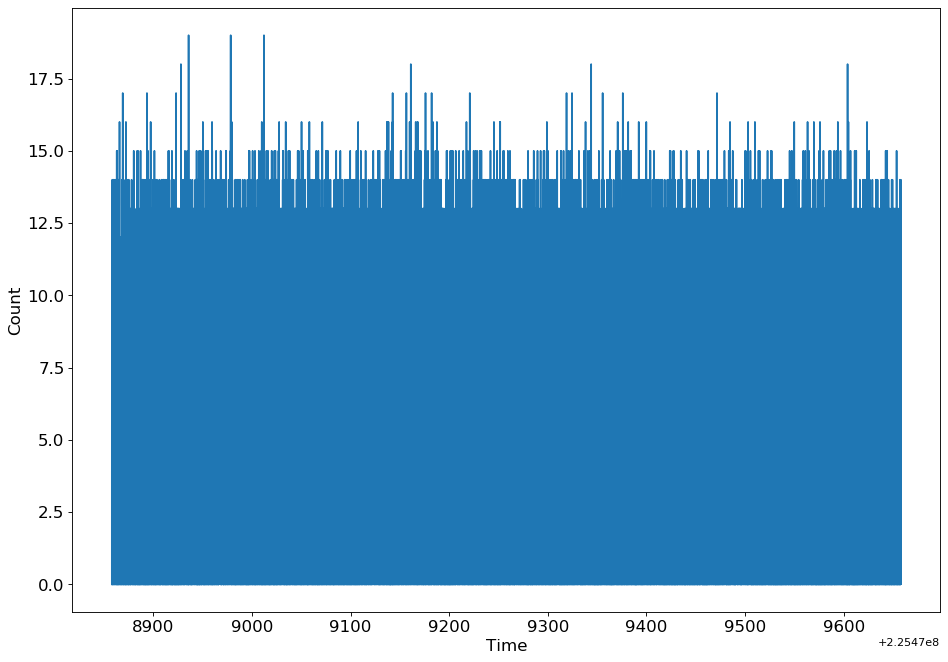

In [91]:
count_list = rate_list * (time_list[1] - time_list[0])

figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(time_list, count_list)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.tick_params(labelsize=15)

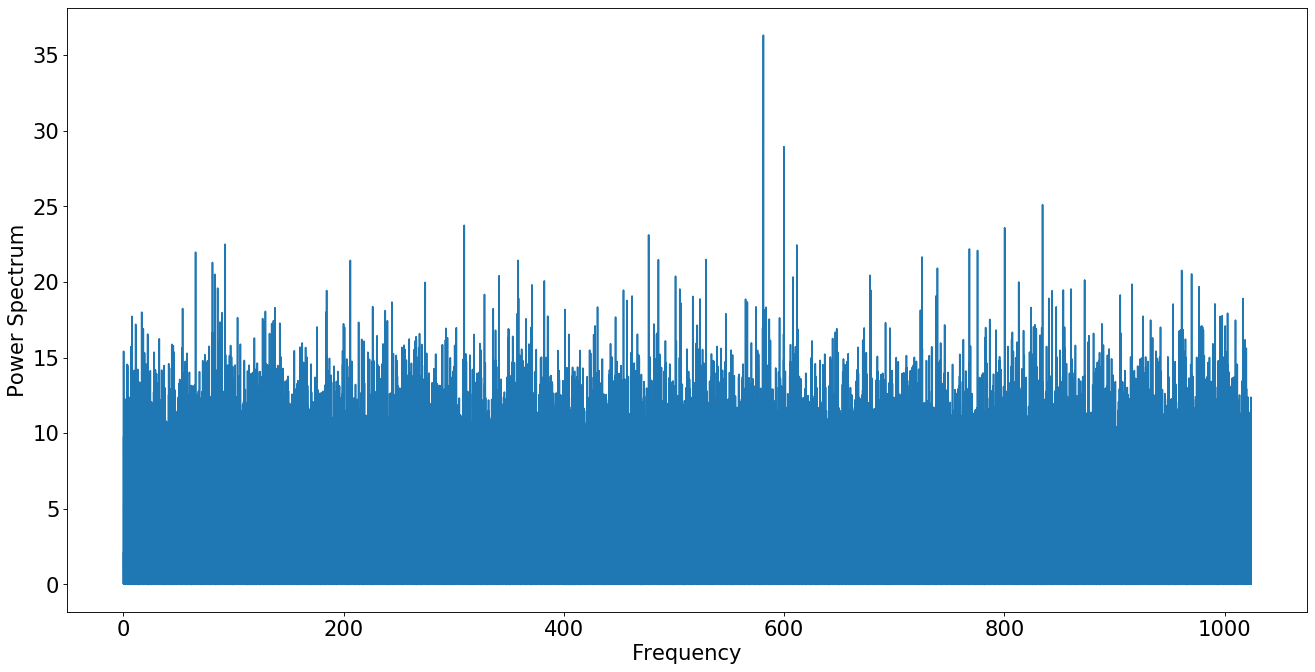

In [90]:
tlen = time_list[-1] - time_list[0]
tres = time_list[2] - time_list[1]
numb = tlen/tres

flen = int(numb / 2)
fres = 1/tlen
fmax = 1./(2*tres)
freq = np.arange(fres, fmax, fres)
freq2 = freq
transf = np.fft.fft(count_list)
powspec = 2.0 * abs(transf[1:int(flen)+1]) * abs(transf[1:int(flen)+1]) / sum(count_list)
powspec2 = powspec

figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(freq[100:], powspec[100:])
plt.xlabel('Frequency',fontsize=19)
plt.ylabel('Power Spectrum',fontsize=19)
plt.tick_params(labelsize=19)


In [56]:
maxElement = np.amax(powspec[100:])
index = np.where(powspec == 36.31160593881194)
print(index[0])

[]


204544 204544 29.06226652207878
204544 204544 28.122141927124968
204544 204544 28.142203876288672
204544 204544 28.122259263587306
204544 204544 28.122141927124968
204544 204544 28.122259263587306
204544 204544 28.122259263587306
204544 204544 28.122259263587306
[576.13169575  24.28851961 581.92522695 581.92613418]


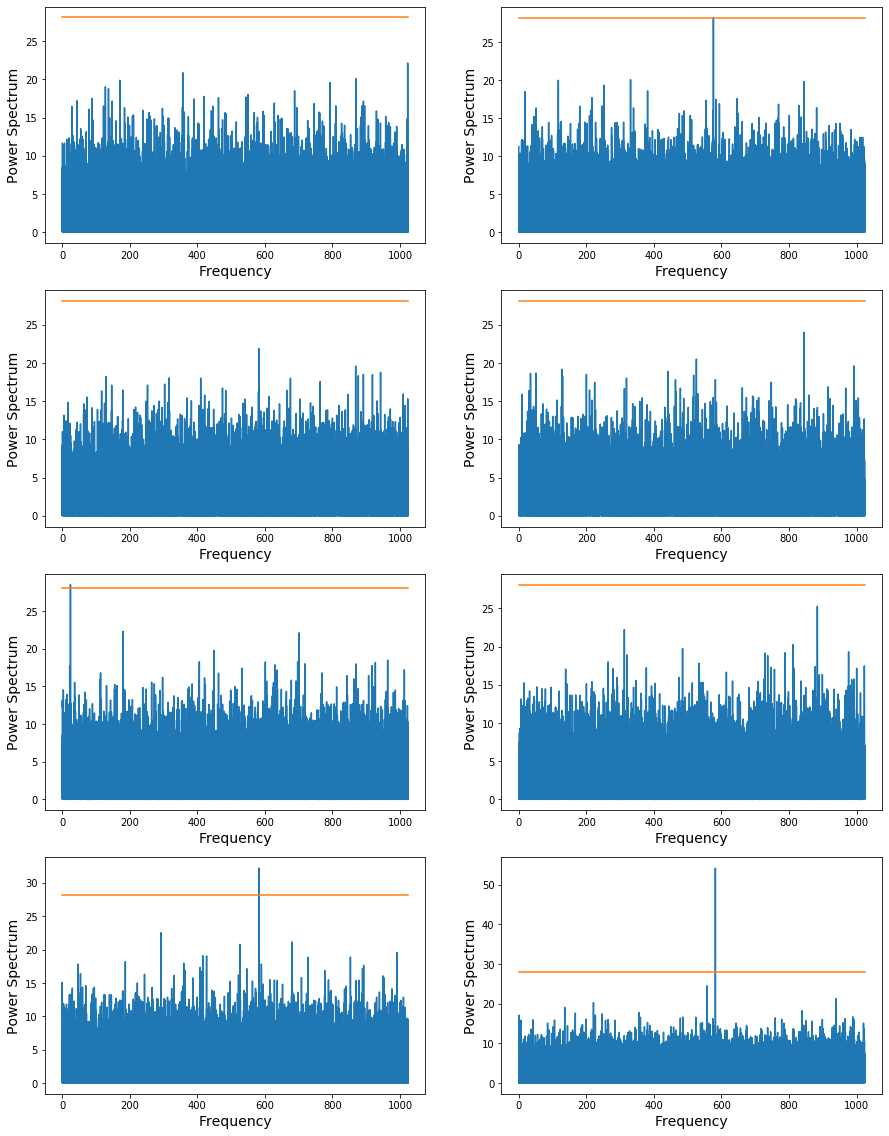

In [102]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))
c_len = len(count_list)
temp_count = count_list[: c_len //8]
temp_time = time_list[: c_len //8 ]
i = 0
j = 0
a = np.zeros(4)

for row in axs:
  for col in row:
    temp_count = count_list[i * (c_len // 8) : (i + 1) * (c_len // 8)]
    temp_time = time_list[i * (c_len // 8) : (i + 1) * (c_len //8)]
    print(len(temp_count), len(temp_time),the_barrier)

    tlen = temp_time[-1] - temp_time[0]
    tres = temp_time[1] - temp_time[0]
    numb = tlen/tres
    flen = int(numb / 2)
    fres = 1/tlen
    fmax = 1./(2*tres)
    freq = np.arange(fres, fmax, fres)
    transf = np.fft.fft(temp_count)
    powspec = 2.0 * abs(transf[1:int(flen)+1]) * abs(transf[1:int(flen)+1]) / sum(temp_count)

    the_barrier = 2*np.log(len(powspec)/0.08)
    maxElement = np.amax(powspec)
    index = np.where(powspec == maxElement)
    if maxElement > the_barrier:
      a[j] = freq[index]
      j += 1    

    col.plot(freq, powspec)
    col.plot([0,freq[-1]],[the_barrier,the_barrier])
    col.set_xlabel("Frequency",fontsize=14)
    col.set_ylabel("Power Spectrum",fontsize=14)



    i += 1
  
print(a)

In [53]:
f = freq[index[0]]
print(f)

[581.92613418]


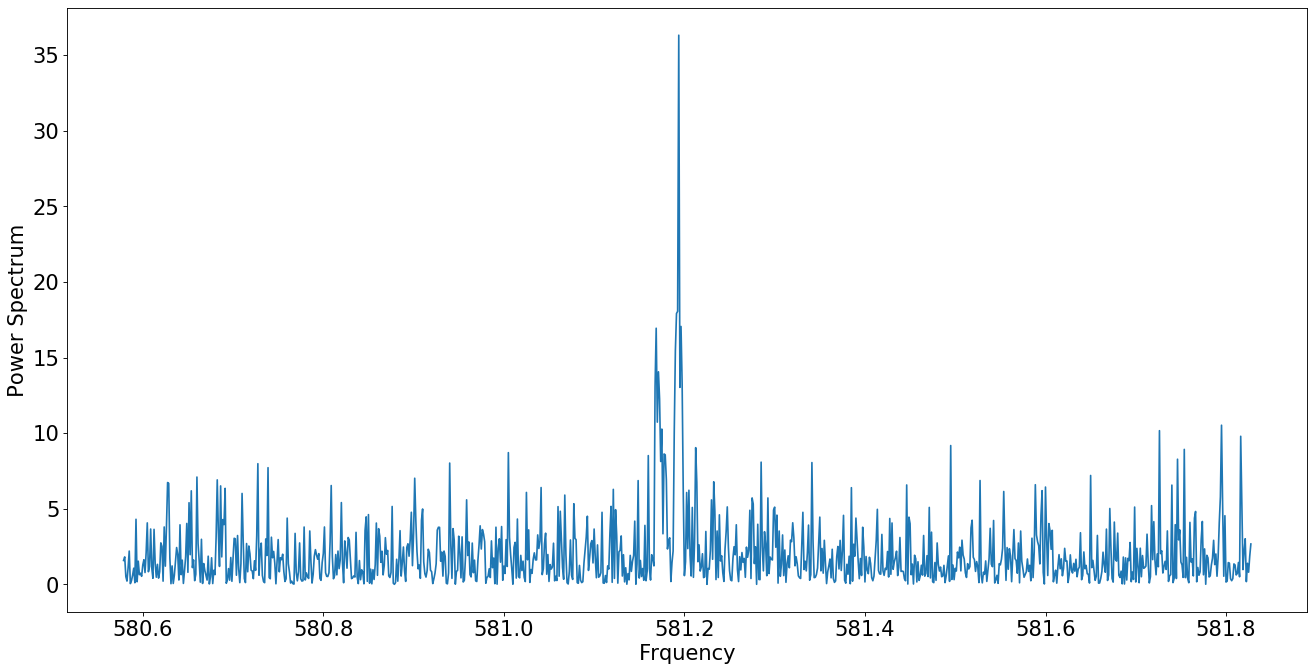

In [88]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(freq2[464500 : 465500], powspec2[464500 : 465500])
plt.xlabel('Frquency',fontsize=19)
plt.ylabel('Power Spectrum',fontsize=19)
plt.tick_params(labelsize=19)